Importing Libraries 

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


import warnings
warnings.filterwarnings('ignore')


Loading dataset 

In [5]:
# Load feature data
values = pd.read_csv('values.csv')

# Load label data
labels = pd.read_csv('labels.csv')


In [6]:
print(values.head())
print(labels.head())

print(values.info())
print(labels.info())


  patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0

Assuming both datasets have a 'patient_id' column to merge on

In [7]:

df = pd.merge(values, labels, on='patient_id')


In [8]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


label encoding 

In [9]:
# Encoding 'thal' which is categorical
label_encoder = LabelEncoder()
df['thal'] = label_encoder.fit_transform(df['thal'])


In [10]:
X = df.drop(columns=['patient_id', 'heart_disease_present'])
y = df['heart_disease_present']


In [11]:
# Drop the patient_id column
df = df.drop(columns=['patient_id'])


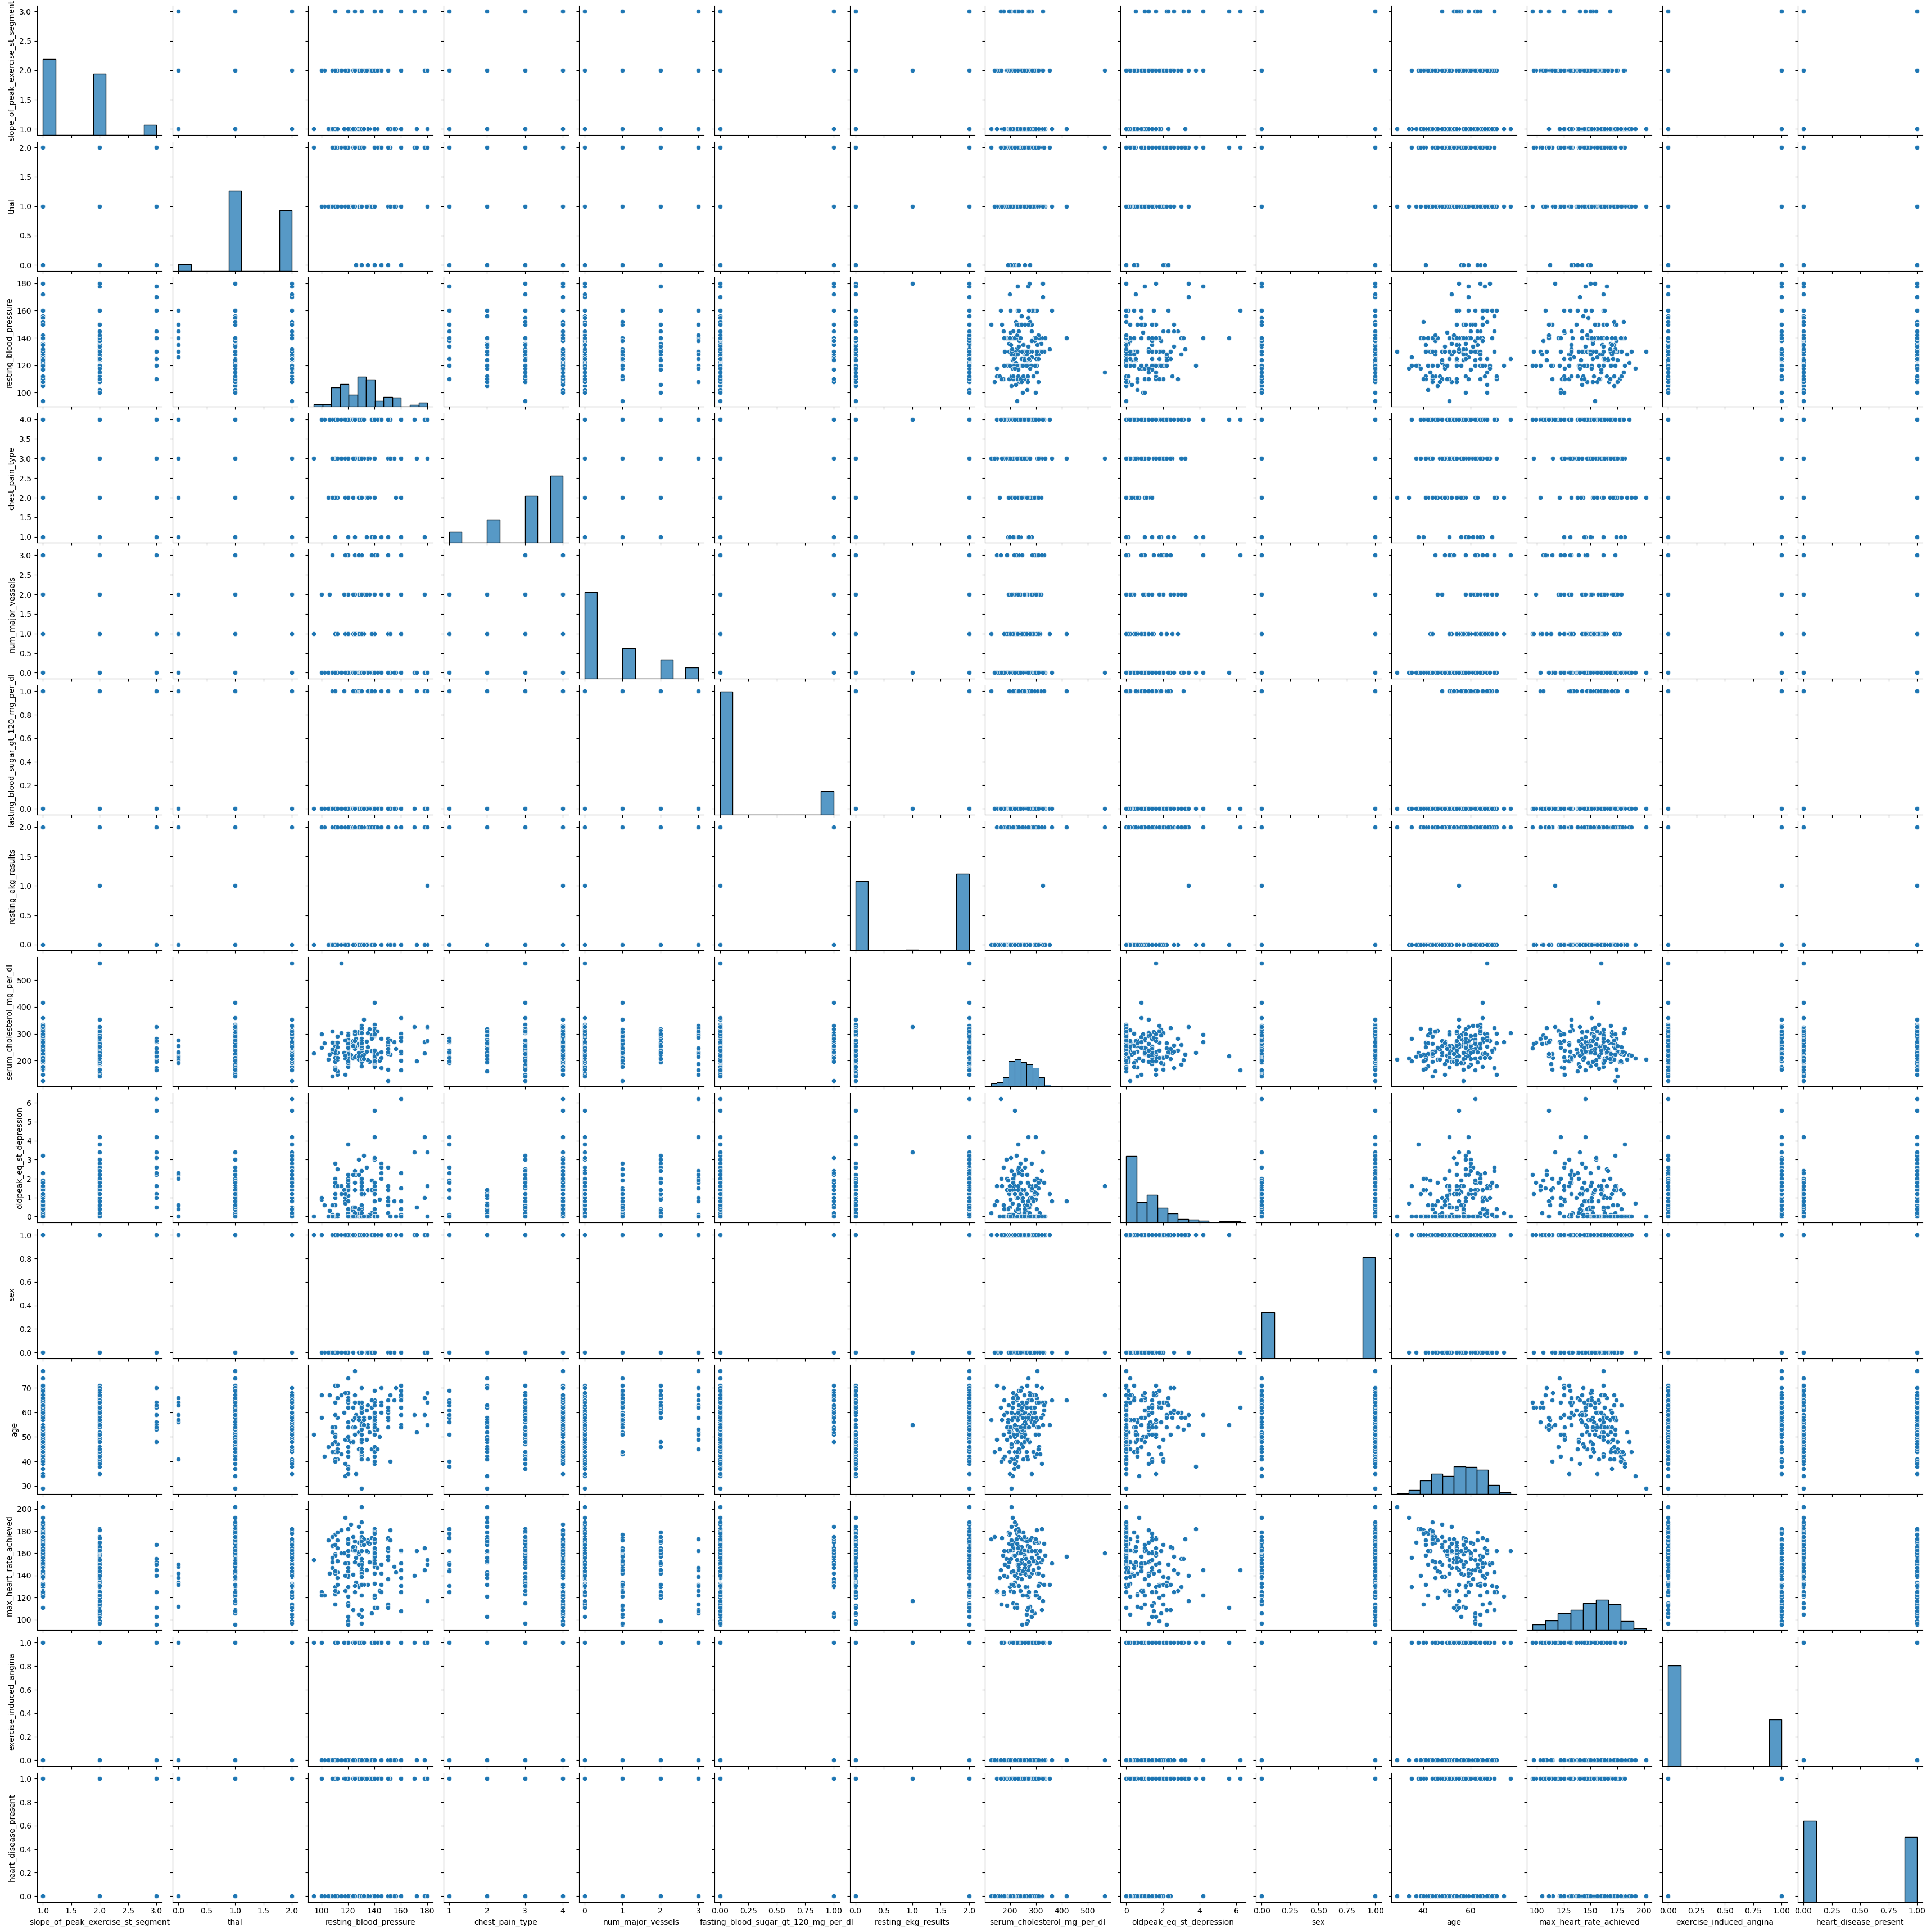

In [12]:
sns.pairplot(df)
plt.show()

Pair plots are particularly useful for identifying patterns, correlations, and outliers in data.

Observation: Younger individuals tend to achieve higher maximum heart rates.
Insight: There might be a visible separation between individuals with and without heart disease based on age and max heart rate, suggesting these features are important predictors.

Chest Pain Type:
Observation: Certain types of chest pain (as indicated by the chest_pain_type feature) are more frequently associated with heart disease.
Insight: Specific chest pain types (like typical angina) could be strong indicators of heart disease presence.

Resting Blood Pressure vs. Serum Cholesterol:
Observation: High resting blood pressure and high serum cholesterol levels often co-occur.
Insight: Both high blood pressure and high cholesterol levels are risk factors for heart disease, and their combination can be particularly indicative of heart disease.

Oldpeak vs. Thal:
Observation: Certain thal values (results from the thallium stress test) are associated with higher oldpeak values (ST depression induced by exercise).
Insight: Abnormal thallium stress test results and high ST depression values are likely indicative of poor heart function and increased risk of heart disease.

Number of Major Vessels Colored by Fluoroscopy:
Observation: Fewer major vessels colored by fluoroscopy are associated with heart disease.
Insight: The number of major vessels visible via fluoroscopy could be inversely correlated with heart disease presence.

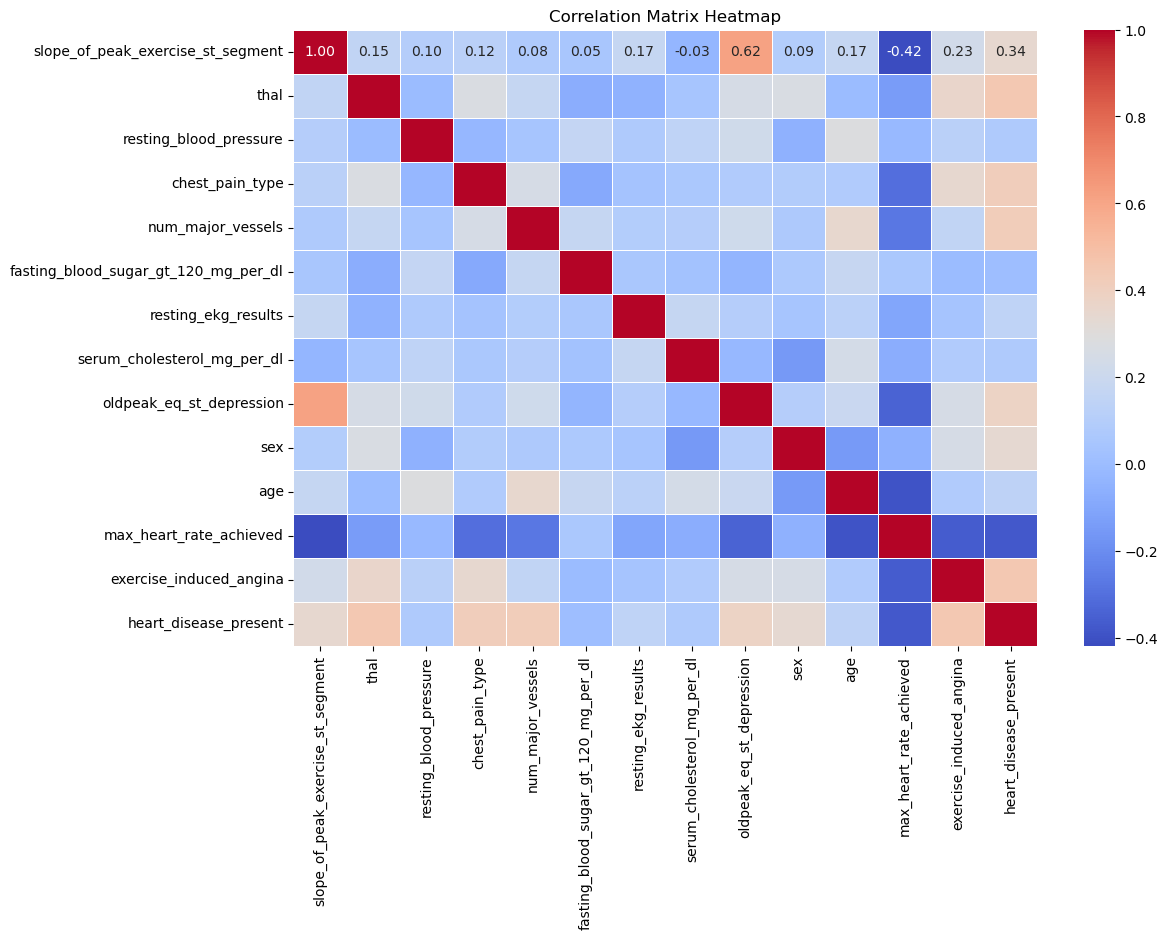

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')
plt.show()


1. num_major_vessels shows a strong negative correlation with heart_disease_present, suggesting that fewer major vessels observed in fluoroscopy are associated with heart disease.
2. chest_pain_type has a strong positive correlation with heart_disease_present, indicating that certain types of chest pain are predictive of heart disease.
3. age shows a negative correlation with max_heart_rate_achieved, indicating that younger individuals tend to achieve higher maximum heart rates.
4. thal results correlate with heart_disease_present, highlighting the importance of thallium stress test outcomes in predicting heart disease.

Training and testing of data 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, precision, recall, f1, roc_auc


Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy: 0.8333
Precision: 0.9375
Recall: 0.7500
F1 Score: 0.8333
ROC AUC Score: 0.8438


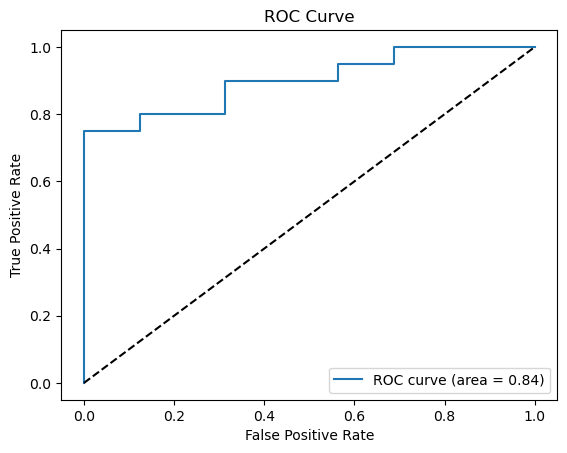

Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.8333
Precision: 0.9375
Recall: 0.7500
F1 Score: 0.8333
ROC AUC Score: 0.8438


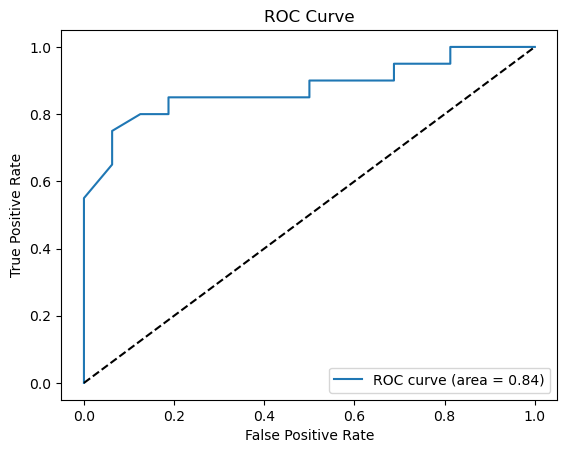

Training Gradient Boosting...
Evaluating Gradient Boosting...
Accuracy: 0.7500
Precision: 0.8235
Recall: 0.7000
F1 Score: 0.7568
ROC AUC Score: 0.7562


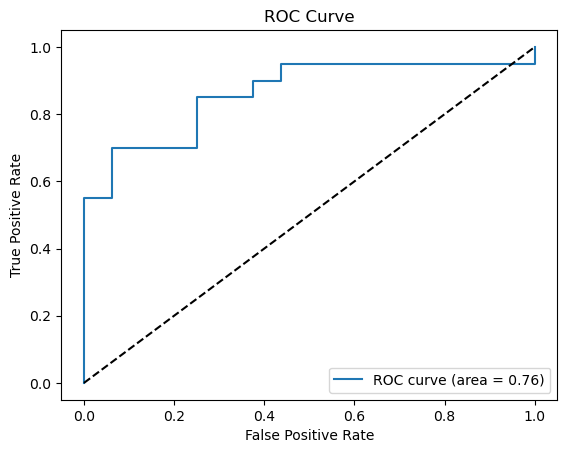

Training AdaBoost...
Evaluating AdaBoost...
Accuracy: 0.7778
Precision: 0.8750
Recall: 0.7000
F1 Score: 0.7778
ROC AUC Score: 0.7875


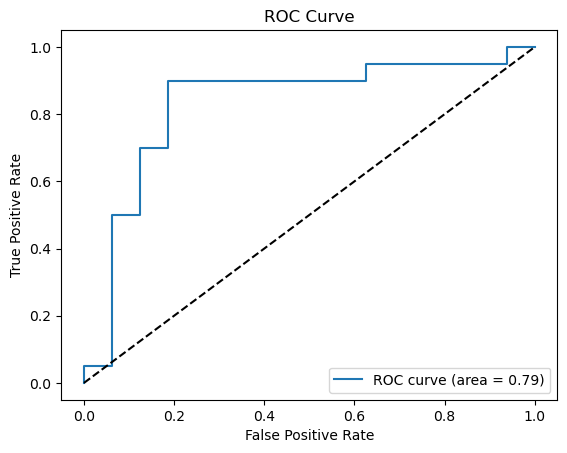

Training Support Vector Machine...
Evaluating Support Vector Machine...
Accuracy: 0.8611
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
ROC AUC Score: 0.8750


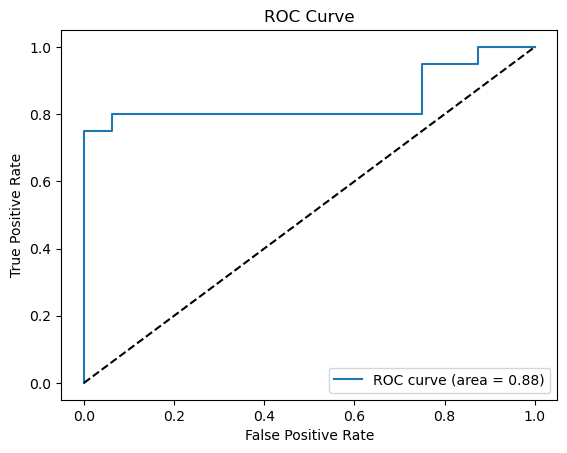

Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy: 0.8611
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
ROC AUC Score: 0.8750


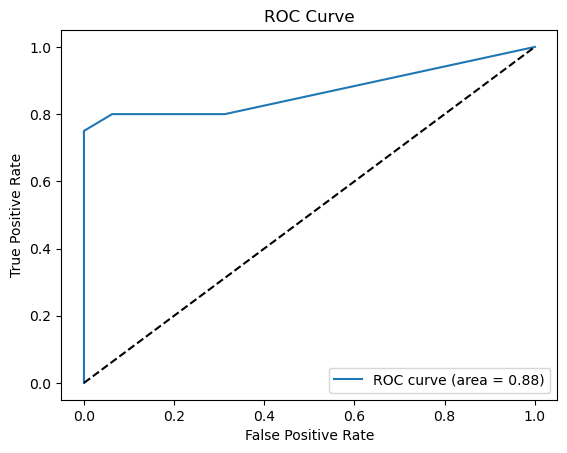

Training Decision Tree...
Evaluating Decision Tree...
Accuracy: 0.7500
Precision: 0.8235
Recall: 0.7000
F1 Score: 0.7568
ROC AUC Score: 0.7562


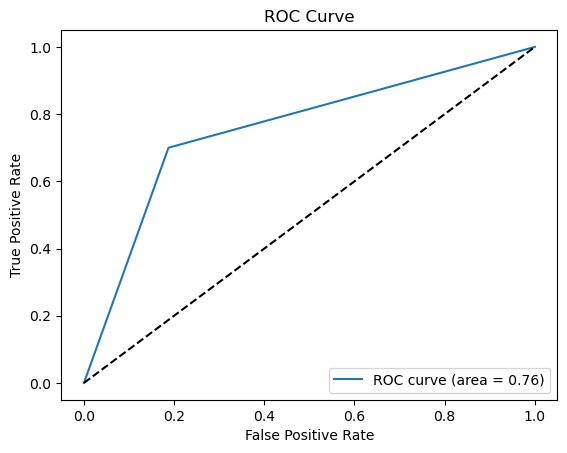

Training Naive Bayes...
Evaluating Naive Bayes...
Accuracy: 0.8056
Precision: 1.0000
Recall: 0.6500
F1 Score: 0.7879
ROC AUC Score: 0.8250


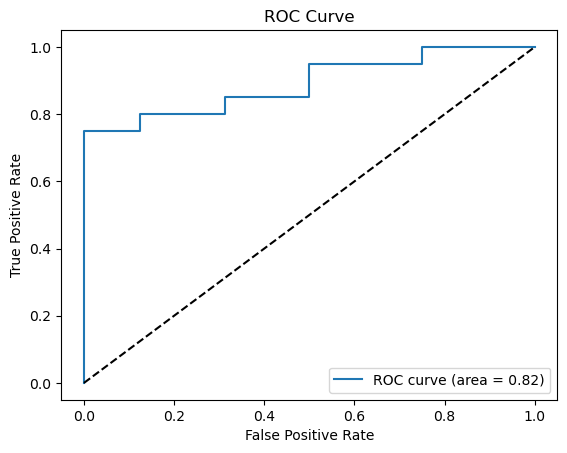

Training Multilayer Perceptron...
Evaluating Multilayer Perceptron...
Accuracy: 0.8333
Precision: 0.9375
Recall: 0.7500
F1 Score: 0.8333
ROC AUC Score: 0.8438


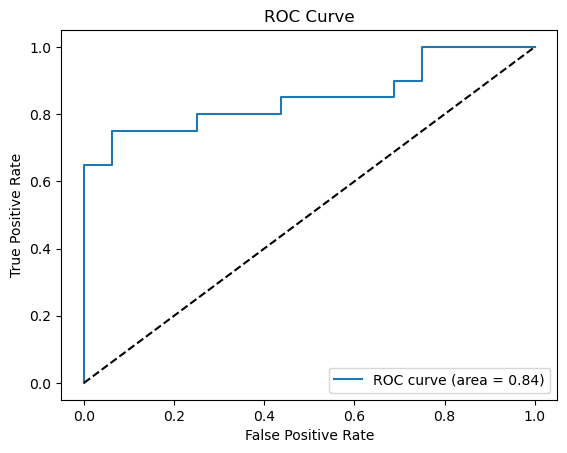

In [17]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000)
}

results = {}

for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train, y_train)
    print(f'Evaluating {model_name}...')
    results[model_name] = evaluate_model(model, X_test, y_test)


In [18]:
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']).T
print(results_df.sort_values(by='F1 Score', ascending=False))


                        Accuracy  Precision  Recall  F1 Score  ROC AUC
Support Vector Machine  0.861111   1.000000    0.75  0.857143  0.87500
K-Nearest Neighbors     0.861111   1.000000    0.75  0.857143  0.87500
Logistic Regression     0.833333   0.937500    0.75  0.833333  0.84375
Random Forest           0.833333   0.937500    0.75  0.833333  0.84375
Multilayer Perceptron   0.833333   0.937500    0.75  0.833333  0.84375
Naive Bayes             0.805556   1.000000    0.65  0.787879  0.82500
AdaBoost                0.777778   0.875000    0.70  0.777778  0.78750
Gradient Boosting       0.750000   0.823529    0.70  0.756757  0.75625
Decision Tree           0.750000   0.823529    0.70  0.756757  0.75625


Got the highest accuracy for support vector machine and KNN 0.86.

In [19]:
import pickle

In [22]:
with open('classifier.pkl','wb') as file:
  pickle.dump(model, file)